##Cableteque: EMI/RFI Banding, Self Locking and Shrink Boot Adapter


Naman Pundir
naman_9@outlook.com

Note: To deal with the data I seperated the tables into 4 different images.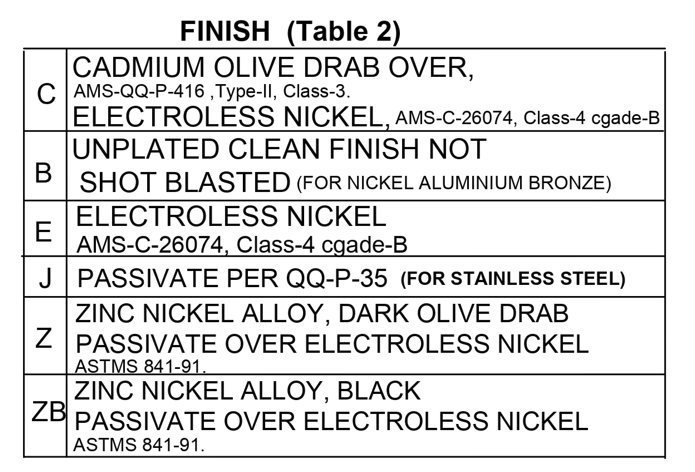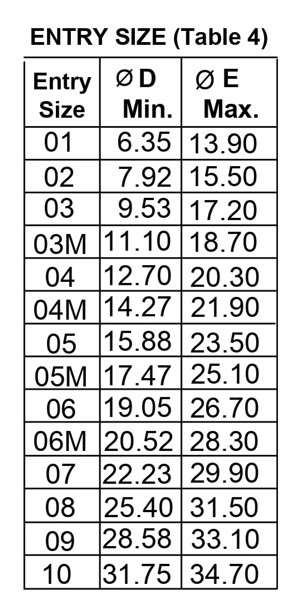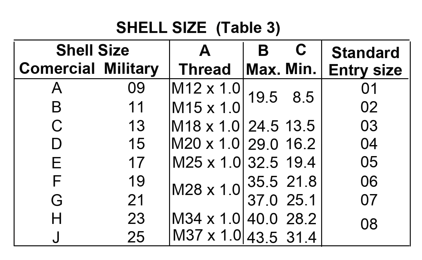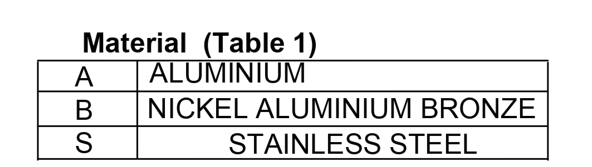

In [21]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


#Using Pytesseract OCR

In [22]:
!pip install pytesseract


##Image 1 : Material Table

In [110]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [111]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/material.png'))


In [112]:
import pandas as pd

text_data = extractedInformation

rows = text_data.strip().split('\n')
data = [row.split(' ', 1) for row in rows]
df = pd.DataFrame(data, columns=['Code', 'Material'])


In [113]:
data = df
df = pd.DataFrame(data)

df = df.dropna().replace('', pd.NA).dropna(how='all')

df.reset_index(drop=True, inplace=True)

print(df)


       Code                 Material
0  Material                (Table 1)
1         A                ALUMINIUM
2         B  NICKEL ALUMINIUM BRONZE
3        Ss          STAINLESS STEEL


In [114]:
df_material = df.drop(0)
df_material.loc[3, 'Code'] = 'S'

In [115]:
df_material


,Code,Material
1,A,ALUMINIUM
2,B,NICKEL ALUMINIUM BRONZE
3,S,STAINLESS STEEL


## Image 2: Entry Table

In [154]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/entry.png'))


In [155]:
extractedInformation

'ENTRY SIZE (Table 4)\n\n \n\nEntry} 9D | @E\nSize | Min.| Max.\n\n \n\n01 | 6.35|13.90\n\n \n\n02 | 7.92{|15.50\n\n \n\n03 | 9.53 {17.20\n\n \n\n03M /11.10 | 18.70\n\n \n\n04 (12.70 | 20.30\n\n \n\n04M [14.27 | 21.90\n\n \n\n05 |15.88 | 23.50\n\n \n\n05M |17.47 | 25.10\n\n \n\n06_|19.05 | 26.70\n\n \n\n06M |20.52| 28.30\n\n \n\n07 [22.23 | 29.90\n\n \n\n08 |25.40|31.50\n\n \n\n09 /28.58 | 33.10\n\n \n\n \n\n \n\n \n\n10 [31.75 | 34.70\n\n \n\n \n\x0c'

In [178]:
import pandas as pd
import re

text_data = extractedInformation
lines = text_data.strip().split('\n')

entry_size = []
min_values = []
max_values = []

for line in lines:
    parts = re.split(r'[^\w.]+', line.strip())

    if len(parts) == 3:
        entry_size.append(parts[0])
        min_values.append(parts[1])
        max_values.append(parts[2])

df = pd.DataFrame({'Entry Size': entry_size, 'Min.': min_values, 'Max.': max_values})



In [179]:
df_entry = df.drop([0, 1]).reset_index(drop=True)



In [180]:
df_entry

,Entry Size,Min.,Max.
0,01,6.35,13.90
1,02,7.92,15.50
2,03,9.53,17.20
3,03M,11.10,18.70
4,04,12.70,20.30
5,04M,14.27,21.90
6,05,15.88,23.50
7,05M,17.47,25.10
8,06_,19.05,26.70
9,06M,20.52,28.30


##Image 3: Finish Table

In [186]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/finish.png'))


In [187]:
extractedInformation

'FINISH (Table 2)\n\n \n\nCADMIUM OLIVE DRAB OVER,\nAMS-QQ-P-416 ,Type-ll, Class-3.\nELECTROLESS NICKEL, Ams-c-26074, Class-4 cgade-B\n\n \n\nwo\n\nUNPLATED CLEAN FINISH NOT\nSHOT BLASTED (FoR NICKEL ALUMINIUM BRONZE)\n\n \n\nE ELECTROLESS NICKEL\n\nAMS-C-26074, Class-4 cgade-B\n\n \n\na\n\nPASSIVATE PER QQ-P-35 (FOR STAINLESS STEEL)\n\n \n\nN\n\nZINC NICKEL ALLOY, DARK OLIVE DRAB\n\nPASSIVATE OVER ELECTROLESS NICKEL\nASTMS 841-91\n\n \n\n \n\nZB)\n\n \n\nZINC NICKEL ALLOY, BLACK\n\nPASSIVATE OVER ELECTROLESS NICKEL\nASTMS 841-91.\n\n \n\n \n\x0c'

In [190]:
import pandas as pd

text_data = """
C CADMIUM OLIVE DRAB OVER
B UNPLATED CLEAN FINISH NOT SHOT BLASTED
E ELECTROLESS NICKEL
J PASSIVATE PER QQ-P-35
Z ZINC NICKEL ALLOY, DARK OLIVE DRAB PASSIVATE OVER ELECTROLESS NICKEL
ZB ZINC NICKEL ALLOY, BLACK PASSIVATE OVER ELECTROLESS NICKEL
"""

lines = text_data.strip().split('\n')

codes = []
finishes = []

for line in lines:
    code, finish = line.split(maxsplit=1)
    codes.append(code.strip())
    finishes.append(finish.strip())

df = pd.DataFrame({'Code': codes, 'Finish': finishes})

df_finish = df


In [191]:
df_finish

,Code,Finish
0,C,CADMIUM OLIVE DRAB OVER
1,B,UNPLATED CLEAN FINISH NOT SHOT BLASTED
2,E,ELECTROLESS NICKEL
3,J,PASSIVATE PER QQ-P-35
4,Z,"ZINC NICKEL ALLOY, DARK OLIVE DRAB PASSIVATE O..."
5,ZB,"ZINC NICKEL ALLOY, BLACK PASSIVATE OVER ELECTR..."


##Image 4 : Shell Table
Note: Due to one entry for two rows OCR was not able to detect, did manually for this.

In [197]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/shell.png'))


In [198]:
extractedInformation

"SHELL SIZE (Table 3)\n\n \n\n  \n\n \n\n \n\nShell Size A BC | Standard\nComercial Military | Thread |Max. Min.| Entry size\n09 [M12 x 1.0) 01\n11 |Mtsx10)'25 &5 02\n\n13 |M1ax1.0/245 135] 03\n15 |M20 x 1.0/29.0 16.2 04\n17 |\\M25x1.0/32.5 194] 05\n19 35.5 21.8] 06\n21 M28x1%) 379 25.4] 07\n23 |M34x 1.0/40.0 28.2] gg\n25 _|M37x 1,043.5 31.4\n\n \n\nWK rammooo>D\n\n \n\n \n\x0c"

In [209]:
import pandas as pd

data = {
    'ShellSize': ['A09', 'B11', 'C13', 'D15', 'E17', 'F19', 'G21', 'H23', 'J25'],
    'A': ['M12 X 1.0', 'M15 X 1.0', 'M18 X 1.0', 'M20 X 1.0', 'M25 X 1.0', 'M28 X 1.0', 'M28 X 1.0', 'M34 X 1.0', 'M37 X 1.0'],
    'B': ['19.5', '19.5', '24.5', '29.0', '32.5', '35.5', '37.0', '40.0', '43.5'],
    'C': ['8.5', '8.5', '13.5', '16.2', '19.4', '21.8', '25.1', '28.2', '31.4'],
    'EntrySize': ['01', '02', '03', '04', '05', '06', '07', '08', '08']
}

df = pd.DataFrame(data)
df_shell = df


In [210]:
df_shell

,ShellSize,A,B,C,EntrySize
0,A09,M12 X 1.0,19.5,8.5,01
1,B11,M15 X 1.0,19.5,8.5,02
2,C13,M18 X 1.0,24.5,13.5,03
3,D15,M20 X 1.0,29.0,16.2,04
4,E17,M25 X 1.0,32.5,19.4,05
5,F19,M28 X 1.0,35.5,21.8,06
6,G21,M28 X 1.0,37.0,25.1,07
7,H23,M34 X 1.0,40.0,28.2,08
8,J25,M37 X 1.0,43.5,31.4,08


##Now we have 4 dataframes of each table

In [217]:
# Assuming you have already created the DataFrames df_material, df_finish, df_shell, and df_entry

print("df_material:")
print(df_material)
print("\n")

print("df_finish:")
print(df_finish)
print("\n")

print("df_shell:")
print(df_shell)
print("\n")

print("df_entry:")
print(df_entry)


df_material:
  Code                 Material
1    A                ALUMINIUM
2    B  NICKEL ALUMINIUM BRONZE
3    S          STAINLESS STEEL


df_finish:
  Code                                             Finish
0    C                            CADMIUM OLIVE DRAB OVER
1    B             UNPLATED CLEAN FINISH NOT SHOT BLASTED
2    E                                 ELECTROLESS NICKEL
3    J                              PASSIVATE PER QQ-P-35
4    Z  ZINC NICKEL ALLOY, DARK OLIVE DRAB PASSIVATE O...
5   ZB  ZINC NICKEL ALLOY, BLACK PASSIVATE OVER ELECTR...


df_shell:
  ShellSize          A     B     C EntrySize
0       A09  M12 X 1.0  19.5   8.5        01
1       B11  M15 X 1.0  19.5   8.5        02
2       C13  M18 X 1.0  24.5  13.5        03
3       D15  M20 X 1.0  29.0  16.2        04
4       E17  M25 X 1.0  32.5  19.4        05
5       F19  M28 X 1.0  35.5  21.8        06
6       G21  M28 X 1.0  37.0  25.1        07
7       H23  M34 X 1.0  40.0  28.2        08
8       J25  M37 X 1.0 

In [227]:
import pandas as pd
from itertools import product

fixed_values = {
    'AAAA': ['AAAA'],
    'YY': ['YY'],
    'A': df_material['Code'].tolist(),
    'C': df_finish['Code'].tolist(),
    'S1': ['00'],
    '15': df_shell['ShellSize'].tolist(),
    '04': df_entry['Entry Size'].tolist(),
    '2': ['2'],
    'SL': ['SL'],
    'S2': ['S', 'M']
}

combinations = product(*fixed_values.values())

permutations = [{'UNIQUE PIN COMBINATIONS': ''.join(combination)} for combination in combinations]

df_permutations = pd.DataFrame(permutations)
df_permutations


,UNIQUE PIN COMBINATIONS
0,AAAAYYAC00A09012SLS
1,AAAAYYAC00A09012SLM
2,AAAAYYAC00A09022SLS
3,AAAAYYAC00A09022SLM
4,AAAAYYAC00A09032SLS
...,...
4531,AAAAYYSZB00J25082SLM
4532,AAAAYYSZB00J25092SLS
4533,AAAAYYSZB00J25092SLM
4534,AAAAYYSZB00J25102SLS


#**TOTAL PIN COMBINATIONS: 4536**

In [232]:
import pandas as pd
from itertools import product

fixed_values = {
    'AAAA': ['AAAA'],
    'YY': ['YY'],
    'A': df_material['Code'].tolist(),
    'C': df_finish['Code'].tolist(),
    'S1': ['00'],
    '15': df_shell['ShellSize'].tolist(),
    '04': df_entry['Entry Size'].tolist(),
    '2': ['2'],
    'SL': ['SL'],
    'S2': ['S', 'M']
}

combinations = product(*fixed_values.values())

permutations = []
for combination in combinations:
    perm_dict = {}
    perm_dict['PIN'] = ''.join(combination)
    for key, value in zip(fixed_values.keys(), combination):
        perm_dict[key] = value
    permutations.append(perm_dict)

df_permutations = pd.DataFrame(permutations)

df_permutations


,PIN,AAAA,YY,A,C,S1,15,04,2,SL,S2
0,AAAAYYAC00A09012SLS,AAAA,YY,A,C,00,A09,01,2,SL,S
1,AAAAYYAC00A09012SLM,AAAA,YY,A,C,00,A09,01,2,SL,M
2,AAAAYYAC00A09022SLS,AAAA,YY,A,C,00,A09,02,2,SL,S
3,AAAAYYAC00A09022SLM,AAAA,YY,A,C,00,A09,02,2,SL,M
4,AAAAYYAC00A09032SLS,AAAA,YY,A,C,00,A09,03,2,SL,S
...,...,...,...,...,...,...,...,...,...,...,...
4531,AAAAYYSZB00J25082SLM,AAAA,YY,S,ZB,00,J25,08,2,SL,M
4532,AAAAYYSZB00J25092SLS,AAAA,YY,S,ZB,00,J25,09,2,SL,S
4533,AAAAYYSZB00J25092SLM,AAAA,YY,S,ZB,00,J25,09,2,SL,M
4534,AAAAYYSZB00J25102SLS,AAAA,YY,S,ZB,00,J25,10,2,SL,S
